In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
import seaborn as sns

In [2]:
data = pd.read_csv("data/zip.train", header=None, sep=" ")

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


In [4]:
calc = data.iloc[:,1:-1]

In [5]:
calc.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [6]:
clusters = 10 # Angabe der Cluster

In [7]:
G = GaussianMixture(n_components=clusters,covariance_type='full').fit(calc)
data['cluster_idx'] = G.predict(calc)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,cluster_idx
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN,5
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN,8
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN,5
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN,1
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN,8


In [9]:
data.sort_values(by=0).head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,cluster_idx
4749,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,6
4877,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.993,0.019,0.835,-0.257,...,0.879,0.082,-0.953,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,5
4882,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.701,0.265,1.000,0.886,...,0.773,0.255,-0.099,-0.877,-1.0,-1.0,-1.0,-1.0,NaN,4
4890,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.205,0.999,0.679,-0.257,...,0.662,0.957,0.064,-0.736,-1.0,-1.0,-1.0,-1.0,NaN,5
898,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,0.404,1.000,0.174,...,0.333,-0.870,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,NaN,5


In [10]:
data[data[0] == 0].groupby("cluster_idx").count()[0].keys()

Int64Index([0, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='cluster_idx')

In [11]:
bar_data = np.zeros((10,10))  
for digit in range(0,10):
    temp_result = data[data[0] == digit].groupby("cluster_idx").count()[0]
    clusters_keys = temp_result.keys()
    for cluster_idx in clusters_keys:
        bar_data[digit][cluster_idx] = temp_result[cluster_idx]

In [17]:
result_df = pd.DataFrame(bar_data, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [27]:
result_df_scaled = result_df.divide(result_df.sum(1), axis=0)

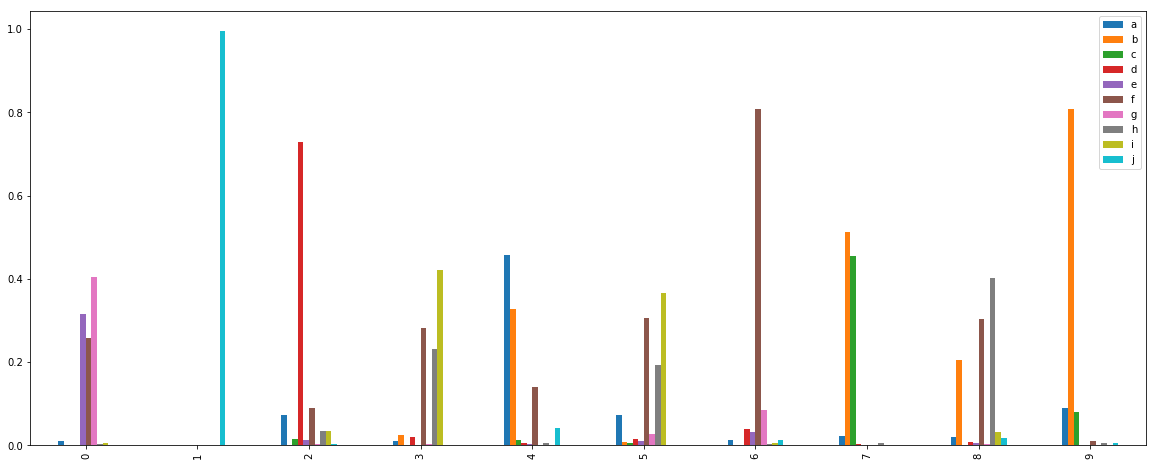

In [30]:
result_df_scaled.plot.bar(figsize=(20,8))

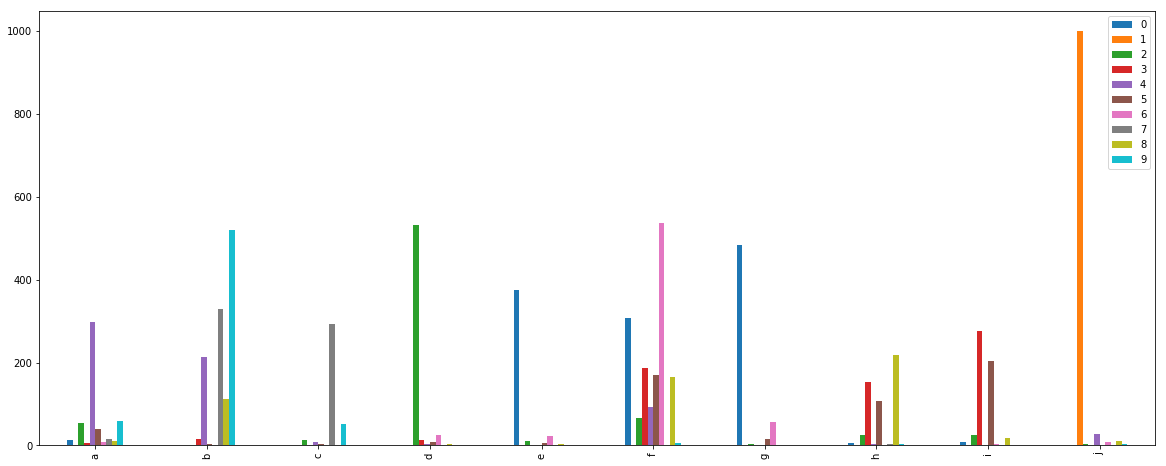

In [29]:
result_df.T.plot.bar(figsize=(20,8))